# Исследование корреляции солнечной активности и биржи

In [1]:
import pandas as pd

In [2]:
#url = 'https://www.spaceweather.gc.ca/solar_flux_data/daily_flux_values/fluxtable.txt'
df = pd.read_csv('fluxtable.txt', delim_whitespace=True, skiprows=[1])

# Объединяем fluxdate и fluxtime в одно поле timestamp
df['timestamp'] = pd.to_datetime(df['fluxdate'].astype(str) + df['fluxtime'].astype(str), format='%Y%m%d%H%M%S')

# Удаляем старые колонки fluxdate и fluxtime
df.drop(columns=['fluxdate', 'fluxtime'], inplace=True)

# Перемещаем колонку timestamp в начало
df = df[['timestamp'] + [col for col in df.columns if col != 'timestamp']]
df.head(3)

,timestamp,fluxjulian,fluxcarrington,fluxobsflux,fluxadjflux,fluxursi
0,2004-10-28 17:00:00,2453307.229,2022.605,132.7,130.9,117.8
1,2004-10-28 20:00:00,2453307.354,2022.610,135.8,134.0,120.6
2,2004-10-29 20:00:00,2453308.354,2022.646,130.6,128.8,115.9


In [3]:
solar=df.set_index('timestamp')[['fluxadjflux']].resample('D').mean().reset_index()
solar.head(3)

,timestamp,fluxadjflux
0,2004-10-28,132.450000
1,2004-10-29,130.550000
2,2004-10-30,139.466667


In [4]:
import yfinance as yf

In [5]:
tickers = '''AAPL, MSFT, AMZN, GOOGL, META, TSLA, JNJ, JPM, V, PG, NVDA, WMT, 
             DIS, BAC, MA, INTC, PFE, XOM, NFLX, ADBE, CRM, KO, PEP, GE'''

# Загружаем данные с конкретной начальной даты
raw_data = yf.download(
    tickers=tickers,
    start="2004-10-28",
    interval="1d",
    progress=True,
    group_by='ticker',
    threads=True ,
)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  24 of 24 completed


In [6]:
raw_data.head(3)

Ticker     TSLA                             ADBE                        \
Price      Open High Low Close Volume       Open       High        Low   
Date                                                                     
2004-10-28  NaN  NaN NaN   NaN    NaN  27.638785  27.938664  27.528831   
2004-10-29  NaN  NaN NaN   NaN    NaN  27.673771  28.008636  27.368895   
2004-11-01  NaN  NaN NaN   NaN    NaN  28.103597  28.483444  27.893683   

Ticker                          ...      AAPL                                \
Price           Close   Volume  ...      Open      High       Low     Close   
Date                            ...                                           
2004-10-28  27.733747  5088800  ...  0.752039  0.785744  0.744817  0.785292   
2004-10-29  28.003637  5136000  ...  0.780026  0.800490  0.779424  0.788452   
2004-11-01  28.158575  4982600  ...  0.789957  0.801392  0.783036  0.789204   

Ticker                        GE                                            
Price          Volume       Open       High        Low      Close   Volume  
Date                                                                        
2004-10-28  864264800  97.157851  98.163923  96.899146  97.818977  3000540  
2004-10-29  810219200  97.445302  98.163931  97.157859  98.077690  3824985  
2004-11-01  602050400  98.020229  98.135208  97.186620  97.876503  2695747  

[3 rows x 120 columns]

In [7]:
# Извлекаем цены закрытия и преобразуем структуру
close_prices = (
    raw_data
    .xs('Close', level=1, axis=1)      # Выбираем уровень Close
    .sort_index()                       # Сортируем по времени
)
close_prices.head(3)

Ticker,TSLA,ADBE,MSFT,BAC,XOM,DIS,JPM,PG,WMT,PFE,...,META,V,PEP,MA,JNJ,INTC,NVDA,AMZN,AAPL,GE
Date,,,,,,,,,,,,,,,,,,,,,
2004-10-28,NaN,27.733747,17.440016,28.174026,24.671701,19.968206,22.336185,29.297031,11.939094,11.836780,...,NaN,NaN,28.334303,NaN,32.409096,12.849726,0.112572,1.7225,0.785292,97.818977
2004-10-29,NaN,28.003637,17.415119,28.344900,24.981319,20.047697,22.405851,29.222801,11.923612,11.935730,...,NaN,NaN,28.357170,NaN,32.615810,12.843955,0.110585,1.7065,0.788452,98.077690
2004-11-01,NaN,28.158575,17.483597,28.547411,24.778296,20.055651,22.347807,29.120022,11.908134,11.873889,...,NaN,NaN,28.197025,NaN,32.649326,12.947812,0.112955,1.7550,0.789204,97.876503


In [8]:
# Для солнечных данных
solar = df.set_index('timestamp')[['fluxadjflux']].resample('D').mean()

# Для цен акций (ваш текущий код)
close_prices = raw_data.xs('Close', level=1, axis=1).sort_index()

# Объединяем данные в один DataFrame
combined = solar.join(close_prices, how='inner').dropna()


combined.head(5)

,fluxadjflux,TSLA,ADBE,MSFT,BAC,XOM,DIS,JPM,PG,WMT,...,META,V,PEP,MA,JNJ,INTC,NVDA,AMZN,AAPL,GE
2012-05-18,134.033333,1.837333,31.309999,23.397013,5.621061,48.813282,38.746349,23.570284,44.061722,16.045567,...,38.084518,25.710617,47.047958,36.651829,43.811577,18.292820,0.276960,10.6925,15.961042,70.976357
2012-05-21,128.333333,1.918000,32.009998,23.780695,5.468922,49.154831,39.259308,22.880554,43.971546,16.202347,...,33.900501,26.527767,46.951263,38.139973,43.894577,18.348949,0.281774,10.9055,16.890938,71.613083
2012-05-22,123.900000,2.053333,32.009998,23.788689,5.589031,49.100899,39.259308,23.936264,43.805054,16.379688,...,30.882032,27.023085,47.020329,38.405666,43.929142,18.264753,0.278335,10.7665,16.761229,71.837830
2012-05-23,119.966667,2.068000,32.180000,23.269115,5.741168,49.154831,39.100117,24.112200,43.277874,16.598150,...,31.878229,27.201120,46.965069,38.744690,43.756256,17.850763,0.285213,10.8640,17.170212,71.837830
2012-05-24,119.766667,2.018667,31.540001,23.237137,5.717146,49.496346,39.303539,23.908110,43.402740,16.724089,...,32.904308,27.338072,47.524513,38.999218,44.063503,17.998114,0.277647,10.7620,17.012514,72.100014


In [17]:
# сохраним промежуточные данные тк у Yahoo Finance серьезные лимиты на IP
combined.to_csv('combined.csv',index=False)

In [9]:
# Рассчитываем корреляции с статистической значимостью
from scipy.stats import pearsonr
ticker_columns = [col for col in combined.columns if col != 'fluxadjflux']

corr_list = []
for ticker in ticker_columns:
    r, p_value = pearsonr(combined['fluxadjflux'], combined[ticker])
    corr_list.append({
        'Ticker': ticker,
        'Correlation': r,
        'p-value': p_value,
        'Significant (5%)': p_value < 0.05
    })

corr_df = pd.DataFrame(corr_list).sort_values('Correlation', key=abs, ascending=False)

print("Детализированные результаты корреляции:")
print(corr_df)

Детализированные результаты корреляции:
   Ticker  Correlation        p-value  Significant (5%)
4     XOM     0.703333   0.000000e+00              True
20   NVDA     0.595303  1.111240e-306              True
23     GE     0.481083  2.392175e-185              True
19   INTC    -0.466379  7.710116e-173              True
22   AAPL     0.451224  1.422321e-160              True
8     WMT     0.438762  6.088241e-151              True
2    MSFT     0.416406  1.209075e-134              True
13  GOOGL     0.372227  7.019356e-106              True
10     KO     0.368707  8.972921e-104              True
5     DIS    -0.363118  1.753712e-100              True
7      PG     0.361320   1.944431e-99              True
0    TSLA     0.356891   6.825978e-97              True
6     JPM     0.341780   1.649979e-88              True
14   META     0.308881   8.268467e-72              True
16    PEP     0.302679   6.862995e-69              True
17     MA     0.289234   8.371392e-63              True
15      

# Проверка

Если эффект есть, значит он должен быть устойчивым.
Просто разделим данные на два промежутка. Выберем дату произвольно

In [10]:
# Разделяем данные на две части по дате
split_date = '2019-01-01'

combined_before = combined.loc[:split_date]  # Все данные ДО 2019-01-01
combined_after = combined.loc[split_date:]   # Все данные ПОСЛЕ 2019-01-01 (включительно)

In [11]:
combined_before.head(3)

,fluxadjflux,TSLA,ADBE,MSFT,BAC,XOM,DIS,JPM,PG,WMT,...,META,V,PEP,MA,JNJ,INTC,NVDA,AMZN,AAPL,GE
2012-05-18,134.033333,1.837333,31.309999,23.397013,5.621061,48.813282,38.746349,23.570284,44.061722,16.045567,...,38.084518,25.710617,47.047958,36.651829,43.811577,18.292820,0.276960,10.6925,15.961042,70.976357
2012-05-21,128.333333,1.918000,32.009998,23.780695,5.468922,49.154831,39.259308,22.880554,43.971546,16.202347,...,33.900501,26.527767,46.951263,38.139973,43.894577,18.348949,0.281774,10.9055,16.890938,71.613083
2012-05-22,123.900000,2.053333,32.009998,23.788689,5.589031,49.100899,39.259308,23.936264,43.805054,16.379688,...,30.882032,27.023085,47.020329,38.405666,43.929142,18.264753,0.278335,10.7665,16.761229,71.837830


In [12]:
combined_after.head(3)

,fluxadjflux,TSLA,ADBE,MSFT,BAC,XOM,DIS,JPM,PG,WMT,...,META,V,PEP,MA,JNJ,INTC,NVDA,AMZN,AAPL,GE
2019-01-02,72.400000,20.674667,224.570007,95.310547,21.551334,51.719879,106.340645,82.916222,77.998955,28.292694,...,135.163696,127.274895,91.920593,183.216736,107.296326,40.518047,3.378090,76.956497,37.667191,37.585003
2019-01-03,70.533333,20.024000,215.699997,91.804245,21.205957,50.925774,103.764336,81.737831,77.452072,28.147198,...,131.238663,122.688324,91.062637,174.951019,105.591354,38.289047,3.173996,75.014000,33.915253,37.631691
2019-01-04,69.566667,21.179333,226.190002,96.074013,22.086666,52.803398,106.965202,84.751122,79.032906,28.323008,...,137.425034,127.973885,92.929970,183.236053,107.363518,40.638535,3.377347,78.769501,35.363079,38.425423


In [13]:

# Создаем функцию для расчета корреляций
def calculate_correlations(df):
    corr_list = []
    for ticker in df.columns.drop('fluxadjflux'):
        r, p_value = pearsonr(df['fluxadjflux'], df[ticker])
        corr_list.append({
            'Ticker': ticker,
            'Correlation': r,
            'p-value': p_value,
            'Significant (5%)': p_value < 0.05
        })
    return pd.DataFrame(corr_list).sort_values('Correlation', key=abs, ascending=False)

# Считаем для первого периода
print("Корреляции ДО 2019-01-01:")
corr_before = calculate_correlations(combined_before)
print(corr_before)

# Считаем для второго периода
print("\nКорреляции ПОСЛЕ 2019-01-01:")
corr_after = calculate_correlations(combined_after)
print(corr_after)

Корреляции ДО 2019-01-01:
   Ticker  Correlation        p-value  Significant (5%)
21   AMZN    -0.708256  1.286142e-253              True
13  GOOGL    -0.704263  1.490077e-249              True
14   META    -0.693574  5.283471e-239              True
6     JPM    -0.690082  1.175258e-235              True
15      V    -0.688774  2.046712e-234              True
2    MSFT    -0.687889  1.405209e-233              True
20   NVDA    -0.687399  4.062678e-233              True
16    PEP    -0.678201  1.282348e-224              True
10     KO    -0.671477  1.340116e-218              True
1    ADBE    -0.667547  3.727956e-215              True
18    JNJ    -0.660193  7.536740e-209              True
11   NFLX    -0.654410  5.151881e-204              True
12    CRM    -0.649794  3.127273e-200              True
17     MA    -0.644770  3.457606e-196              True
22   AAPL    -0.637069  3.892726e-190              True
19   INTC    -0.630538  3.880423e-185              True
3     BAC    -0.615966

**ВЫВОДЫ**: Эффект не повторился в двух разных промежутках времени


# Графики
все же попробуем графически понять почему некоторые тикеры  хорошо коррелируют

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_ticker_correlation(ticker, df=combined):
    """
    Анализирует корреляцию между солнечной активностью и указанным тикером.
    
    Параметры:
    ticker (str): Название тикера (например, 'XOM')
    df (DataFrame): DataFrame с данными (по умолчанию combined)
    """
    # Проверка наличия тикера
    if ticker not in df.columns:
        print(f"Ошибка: Тикер {ticker} отсутствует в данных")
        return
    
    # Создаем копию данных для безопасной обработки
    data = df[['fluxadjflux', ticker]].copy()
    
    # Нормализация данных
    def manual_minmax_scale(series):
        return (series - series.min()) / (series.max() - series.min())
    
    data_norm = pd.DataFrame({
        'fluxadjflux_norm': manual_minmax_scale(data['fluxadjflux']),
        f'{ticker}_norm': manual_minmax_scale(data[ticker])
    }, index=data.index)
    
    # График временных рядов
    plt.figure(figsize=(14, 6))
    plt.title(f'Сравнение нормализованных рядов: Солнечная активность vs {ticker}')
    
    plt.plot(data_norm['fluxadjflux_norm'], 
             label='Solar Flux (norm)', 
             color='orange',
             alpha=0.7)
    
    plt.plot(data_norm[f'{ticker}_norm'], 
             label=f'{ticker} Price (norm)', 
             color='blue',
             alpha=0.5,
             linestyle='--')
    
    plt.legend()
    plt.xlabel('Дата')
    plt.ylabel('Нормализованные значения')
    plt.grid(True)
    plt.show()
    
    # Scatter plot с регрессией
    plt.figure(figsize=(8, 6))
    sns.regplot(x=data['fluxadjflux'], 
                y=data[ticker],
                scatter_kws={'alpha':0.3, 'color':'green'},
                line_kws={'color':'red'})
    
    plt.title(f'Корреляция: Солнечный Flux vs Цена {ticker}')
    plt.xlabel('Solar Flux Adjusted')
    plt.ylabel(f'{ticker} Stock Price')
    plt.grid(True)
    
    # Рассчет корреляции
    r = data['fluxadjflux'].corr(data[ticker])
    plt.annotate(f'Pearson r = {r:.2f}\nN = {len(data):,}', 
                 xy=(0.05, 0.95), 
                 xycoords='axes fraction',
                 fontsize=12,
                 bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()


Нарисуем лучший случай

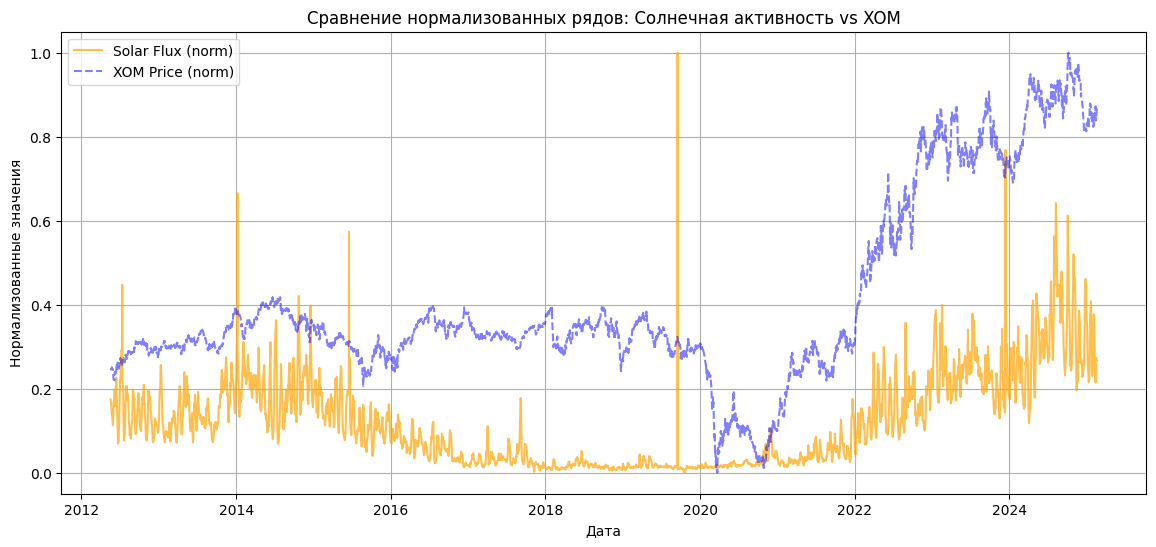

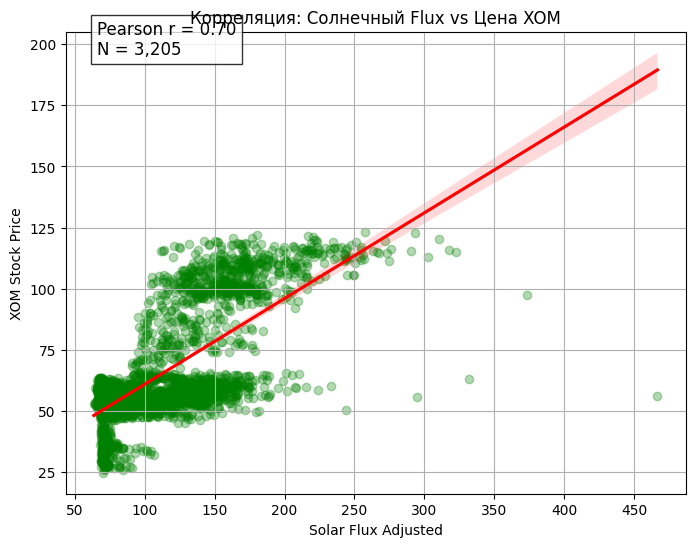

In [15]:

analyze_ticker_correlation('XOM')

Нарисуем худший случай

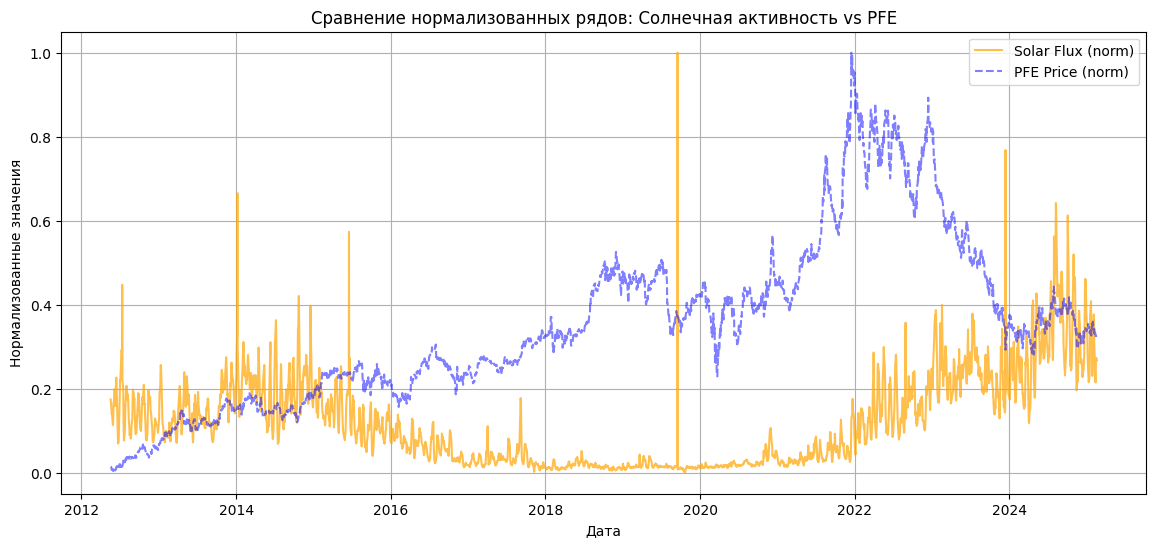

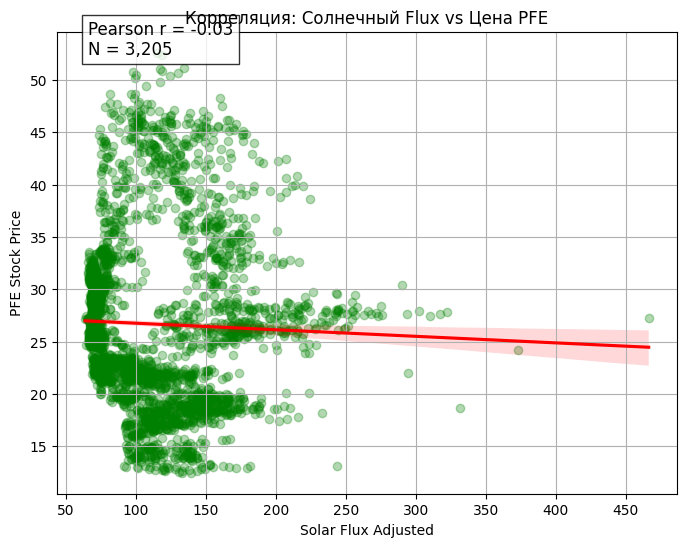

In [16]:
analyze_ticker_correlation('PFE')

# Выводы

- На Солнце есть длинные циклы.
- Иногда эти циклы совпадают с развитием компаний.
- Иногда эта корреляция довольно высокая